In [1]:
import pandas as pd

In [2]:
metal_types = [
    'ZN', 'CA', 'MG', 'MN', 'FE',
    'CU', 'NI', 'CO', 'FES', 'SF4',
    'F3S', 'N/A'
]

# m for true, n for pred 
cm_dict = dict()
for m in metal_types:
    cm_dict[m] = dict()
    for n in metal_types:
        cm_dict[m][n] = 0

In [3]:
df_pred = pd.read_table("../pred_metal_type.tsv")
df_anno = pd.read_table(f"{PROJECT_DIR}/dataset/transform/test_metalnet.tsv")

anno_resi_to_type = dict()
pred_resi_to_type = dict()

for _, row in df_anno.iterrows():
    metal_type = row['metal_resi']
    resi_id = row['seq_id'], row['resi_domain_posi']
    anno_resi_to_type[resi_id] = metal_type
    
for _, row in df_pred.iterrows():
    preds = row['pred'].split(";")
    resi_id = row['seq_id'], row['resi_seq_posi']
    pred_resi_to_type[resi_id] = set(preds)

In [4]:
for resi_id, true_type in anno_resi_to_type.items():
    if resi_id not in pred_resi_to_type.keys():
        cm_dict[true_type]["N/A"] += 1
    else:
        pred_types = pred_resi_to_type[resi_id]
        
        # if the resi has multiple predicted type, counted all of them in confusion matrix
        # so the recall calculated from the matrix will be lower than that in "./compare.ipynb"
        for p in pred_types:
            cm_dict[true_type][p] += 1

for resi_id, pred_type in pred_resi_to_type.items():
    if resi_id not in anno_resi_to_type.keys():
        pred_types = pred_resi_to_type[resi_id]
        for p in pred_types:
            cm_dict["N/A"][p] += 1

In [5]:
cm_df = pd.DataFrame(cm_dict).transpose()

<Axes: >

Text(0.5, 23.52222222222222, 'Predicted')

Text(50.722222222222214, 0.5, 'Truth')

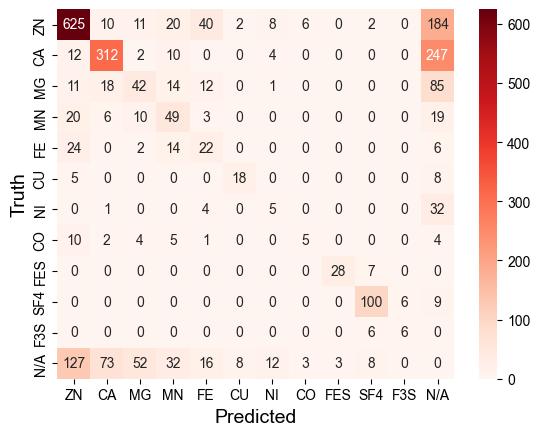

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = "Arial"

sns.heatmap(cm_df, annot=True, fmt='d', cmap="Reds")
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Truth', fontsize=14)
plt.savefig("./fig/confusion_matrix_metal_type.pdf", bbox_inches="tight")